In [1]:
#import necessary librariesabs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#load the data set of process parameters as X, and of resulting quality as Y 
X = pd.read_csv("data_X.csv")
Y = pd.read_csv("data_Y.csv")

In [3]:
#check X dataframe
X.head()


,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [4]:
x_rows,x_cols = X.shape
print("Number of entries:",x_rows)
print("Number of columns:",x_cols)

Number of entries: 2103841
Number of columns: 18


In [5]:
#Check Y dataframe
Y.head()

,date_time,quality
0,2015-01-04 00:05:00,392
1,2015-01-04 01:05:00,384
2,2015-01-04 02:05:00,393
3,2015-01-04 03:05:00,399
4,2015-01-04 04:05:00,400


In [6]:

Y.head()
y_rows,y_cols = Y.shape
print("Number of entries:",y_rows)
print("Number of columns:",y_cols)

Number of entries: 29184
Number of columns: 2


In [7]:
# Selecting a row from X dataset according to Y dataset timestamp
X[X["date_time"]=="2015-01-04 03:05:00"]

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
4505,2015-01-04 03:05:00,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11


### There is significantly high number of entries of X than Y. So, we need to merge two data sets according to time stamp and create a new data set for analysis based on number of available data on Y.

In [8]:
#Selecting rows available in Y dataframe
data = pd.merge(X,Y,on=["date_time"])

In [9]:
#Checking new dataframe
data.set_index('date_time', inplace=True)
data = data.rename(columns={"T_data_1_1":"T1_1","T_data_1_2":"T1_2","T_data_1_3":"T1_3",
                            "T_data_2_1":"T2_1","T_data_2_2":"T2_2","T_data_2_3":"T2_3",
                            "T_data_3_1":"T3_1","T_data_3_2":"T3_2","T_data_3_3":"T3_3",
                            "T_data_4_1":"T4_1","T_data_4_2":"T4_2","T_data_4_3":"T4_3",
                            "T_data_5_1":"T5_1","T_data_5_2":"T5_2","T_data_5_3":"T5_3",
                            "H_data":"Layer_height","AH_data":"Humidity"})
data.head()

,T1_1,T1_2,T1_3,T2_1,T2_2,T2_3,T3_1,T3_2,T3_3,T4_1,T4_2,T4_3,T5_1,T5_2,T5_3,Layer_height,Humidity,quality
date_time,,,,,,,,,,,,,,,,,,
2015-01-04 00:05:00,277,326,273,322,335,352,505,501,670,326,379,337,231,236,242,153.77,7.90,392
2015-01-04 01:05:00,277,253,272,320,333,355,500,501,687,337,396,335,234,242,230,158.27,6.96,384
2015-01-04 02:05:00,262,218,260,326,336,330,505,499,443,347,399,332,243,251,240,153.36,7.29,393
2015-01-04 03:05:00,243,238,252,327,329,308,520,498,540,342,387,334,257,258,246,153.21,7.11,399
2015-01-04 04:05:00,236,238,245,323,320,318,522,501,524,343,371,344,264,263,265,195.71,7.97,400


In [10]:
data_rows,data_cols = data.shape
print("Number of entries:",data_rows)
print("Number of columns:",data_cols)

Number of entries: 29184
Number of columns: 18


## About the data:

### The coffee roasting machine contains 5 chambers each with three temperature sensors. The height of raw material layer height and  humidity is  collected. Quality of product is measured in lab by samples taken every hour, thus we only have data for quality every hour. 

### Now we can start exploring our data and performing analysis



In [11]:
decribe = data.describe()
decribe.to_csv('describe.csv')

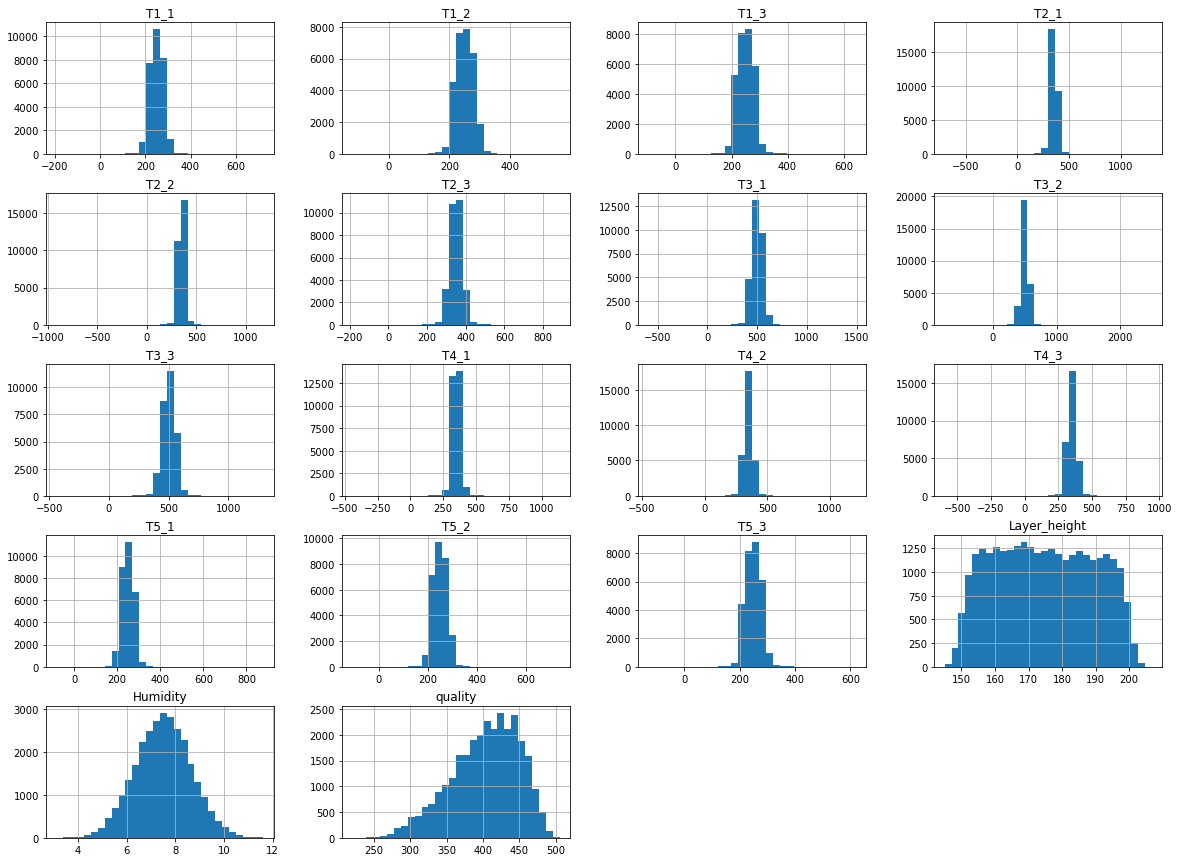

In [12]:
data.hist(bins=30,figsize=(20,15))
plt.title('Histogram of all parameters')
plt.savefig('histogram.png')
plt.show()

In [13]:
#Removing inconsistent data
#removing negative entries of temperature in any row
data = data[data.T1_1 > 0]
data = data[data.T1_2 > 0]
data = data[data.T1_3 > 0]
data = data[data.T2_1 > 0]
data = data[data.T2_2 > 0]
data = data[data.T2_3 > 0]
data = data[data.T3_1 > 0]
data = data[data.T3_2 > 0]
data = data[data.T3_3 > 0]
data = data[data.T4_1 > 0]
data = data[data.T4_2 > 0]
data = data[data.T4_3 > 0]
data = data[data.T5_1 > 0]
data = data[data.T5_2 > 0]
data = data[data.T5_3 > 0]
#Not so pythonic approach

In [14]:
data.describe()

,T1_1,T1_2,T1_3,T2_1,T2_2,T2_3,T3_1,T3_2,T3_3,T4_1,T4_2,T4_3,T5_1,T5_2,T5_3,Layer_height,Humidity,quality
count,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000,28980.000000
mean,250.191822,249.912077,250.253623,350.402277,350.161732,350.104417,501.365597,501.275569,501.390407,349.216908,349.392995,349.983575,249.808040,249.757798,249.922567,174.732235,7.499307,402.881539
std,31.640458,30.002536,30.224180,39.632339,37.596766,37.367779,60.391153,61.967155,60.366607,37.393547,36.883611,37.380529,30.559946,29.897605,30.277812,14.398208,1.147050,46.240574
min,2.000000,11.000000,4.000000,1.000000,6.000000,7.000000,2.000000,5.000000,4.000000,13.000000,10.000000,3.000000,5.000000,1.000000,5.000000,145.000000,3.120000,221.000000
25%,228.000000,229.000000,229.000000,328.000000,328.000000,328.000000,464.000000,463.000000,464.000000,327.000000,327.000000,328.000000,229.000000,229.000000,228.000000,162.450000,6.730000,372.000000
50%,250.000000,250.000000,250.000000,350.000000,350.000000,350.000000,502.000000,502.000000,502.000000,349.000000,349.000000,350.000000,250.000000,250.000000,250.000000,174.380000,7.510000,408.000000
75%,272.000000,271.000000,272.000000,372.000000,372.000000,372.000000,537.000000,537.000000,538.000000,371.000000,371.000000,371.000000,271.000000,271.000000,271.000000,186.952500,8.280000,439.000000
max,722.000000,564.000000,643.000000,1299.000000,1178.000000,886.000000,1491.000000,2492.000000,1294.000000,1136.000000,1204.000000,944.000000,879.000000,737.000000,619.000000,206.680000,11.620000,505.000000


In [15]:
#removing burning temperature entries of temperature in any row
data = data[data.T1_1 < 1000]
data = data[data.T1_2 < 1000]
data = data[data.T1_3 < 1000]
data = data[data.T2_1 < 1000]
data = data[data.T2_2 < 1000]
data = data[data.T2_3 < 1000]
data = data[data.T3_1 < 1000]
data = data[data.T3_2 < 1000]
data = data[data.T3_3 < 1000]
data = data[data.T4_1 < 1000]
data = data[data.T4_2 < 1000]
data = data[data.T4_3 < 1000]
data = data[data.T5_1 < 1000]
data = data[data.T5_2 < 1000]
data = data[data.T5_3 < 1000]

In [16]:
data.describe()

,T1_1,T1_2,T1_3,T2_1,T2_2,T2_3,T3_1,T3_2,T3_3,T4_1,T4_2,T4_3,T5_1,T5_2,T5_3,Layer_height,Humidity,quality
count,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000,28920.000000
mean,250.195574,249.911134,250.261169,350.287275,350.105602,350.102386,500.899965,500.784578,501.072891,349.151418,349.353769,350.003008,249.790318,249.744260,249.913174,174.731834,7.499455,402.875450
std,31.645932,29.984297,30.230422,38.506306,37.252937,37.383536,57.587149,57.598387,58.768086,36.796266,36.290701,37.386350,30.562261,29.901212,30.280078,14.393860,1.147262,46.249872
min,2.000000,11.000000,4.000000,1.000000,6.000000,7.000000,2.000000,5.000000,4.000000,13.000000,10.000000,3.000000,5.000000,1.000000,5.000000,145.000000,3.120000,221.000000
25%,228.000000,229.000000,229.000000,328.000000,328.000000,328.000000,464.000000,463.000000,464.000000,327.000000,327.000000,328.000000,229.000000,229.000000,228.000000,162.450000,6.730000,372.000000
50%,250.000000,250.000000,250.000000,350.000000,350.000000,350.000000,502.000000,502.000000,502.000000,349.000000,349.000000,350.000000,250.000000,250.000000,250.000000,174.380000,7.510000,408.000000
75%,272.000000,271.000000,272.000000,372.000000,372.000000,372.000000,537.000000,537.000000,538.000000,371.000000,371.000000,372.000000,270.250000,271.000000,271.000000,186.940000,8.280000,439.000000
max,722.000000,564.000000,643.000000,924.000000,988.000000,886.000000,991.000000,981.000000,987.000000,863.000000,869.000000,944.000000,879.000000,737.000000,619.000000,206.680000,11.620000,505.000000


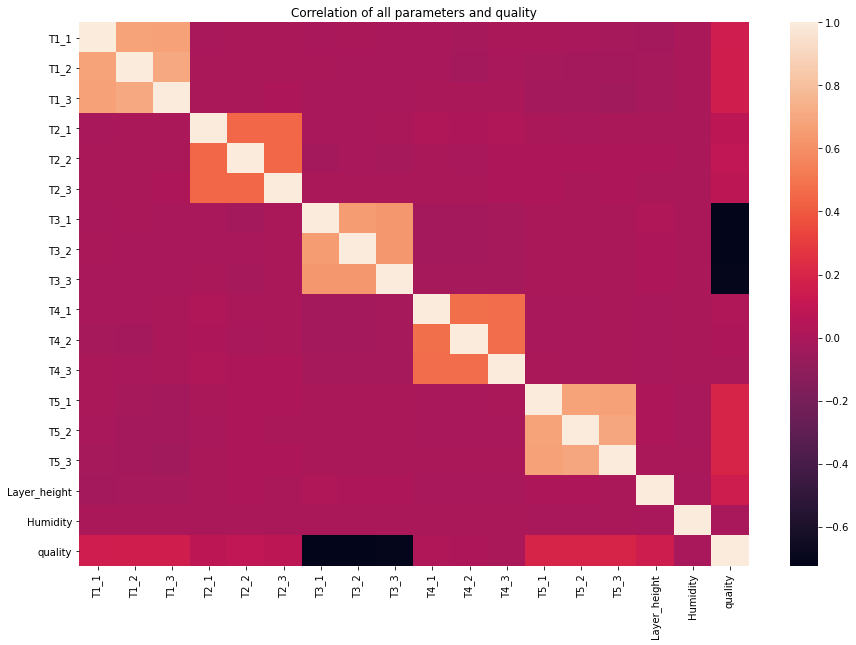

In [17]:
plt.figure(figsize=(15, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation of all parameters and quality')
plt.savefig('correlation_all.png',dpi=100,bbox_inches = 'tight')
plt.show()



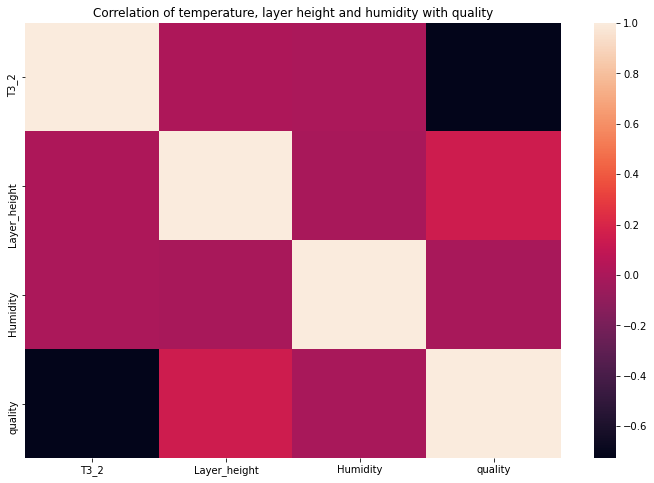

In [18]:
plt.figure(figsize=(12, 8))
corr_data = data[["T3_2","Layer_height","Humidity","quality"]].copy()
plt.title('Correlation of temperature, layer height and humidity with quality')
cor_matrix = corr_data.corr()
sns.heatmap(cor_matrix)
plt.savefig('correlation_notall.png',dpi=100,bbox_inches = 'tight')
plt.show()


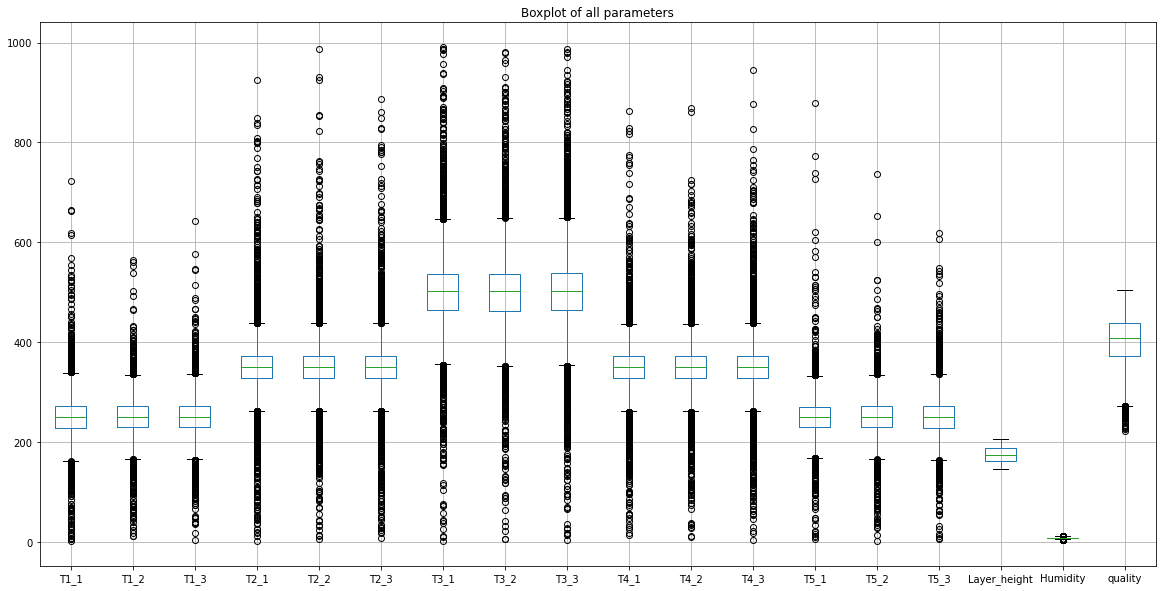

In [19]:
data.boxplot(figsize=(20,10))
plt.title('Boxplot of all parameters')
plt.savefig('boxplot.png',bbox_inches = 'tight',dpi=100)
plt.show()


### No clear correlation. Negative correlation with chamber 3 data. Although 5 chambers of roasting unit clearly correlate.

In [20]:
#Preparing data for prediction
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2,random_state=5)

In [21]:
#Preparing training data
X_train = train_set.iloc[:,:-1]
Y_train = train_set.iloc[:,-1]

In [22]:
#Preparing testing data
x_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

# Prediction of Quality


### (LR,DT,NN,KNN)




# Supervised Technique

1. Decision Tree Algorithm:2 step process: learning and prediction:      
2. MLR

In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X_train,Y_train)
dt_y_predict = tree_reg.predict(x_test)


In [24]:
#Logistic Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_y_predict = lr.predict(x_test)
print(len(lr_y_predict))

5784


In [26]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=15,random_state=0)
rfr.fit(X_train,Y_train)
rfr_y_predict = rfr.predict(x_test)


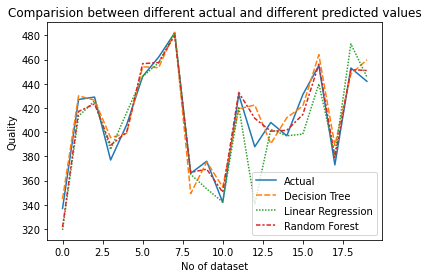

In [64]:
dfs = pd.DataFrame(list(zip(y_test[0:20],dt_y_predict[0:20],lr_y_predict[0:20],rfr_y_predict[0:20])),
               columns =['Actual', 'Decision Tree','Linear Regression','Random Forest'])
sns.lineplot(data=dfs)
plt.xlabel('No of dataset')
plt.ylabel('Quality')
plt.title('Comparision between different actual and different predicted values')
plt.savefig('Compare Re.png',dpi=100,bbox_inches = 'tight')

In [27]:
from sklearn.metrics import mean_squared_error
print("Error using decision tree:", mean_squared_error(y_test,dt_y_predict))
print("Error using linear regression:", mean_squared_error(y_test,lr_y_predict))
print("Error using random forest :", mean_squared_error(y_test,rfr_y_predict))

Error using decision tree: 326.61390855935696
Error using linear regression: 422.41899699701645
Error using random forest : 176.2285652754563


In [35]:
from sklearn.metrics import mean_absolute_error
print("Error using decision tree:", mean_absolute_error(y_test,dt_y_predict))
print("Error using linear regression:", mean_absolute_error(y_test,lr_y_predict))
print("Error using random forest :", mean_absolute_error(y_test,rfr_y_predict))

Error using decision tree: 13.56080150267524
Error using linear regression: 14.612267779173344
Error using random forest : 9.8376394201605


# Unsupervised Technique

K-Means Clustering



In [44]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn import metrics, cluster
from sklearn.preprocessing import LabelEncoder
data_scaled = StandardScaler().fit_transform(x_test)

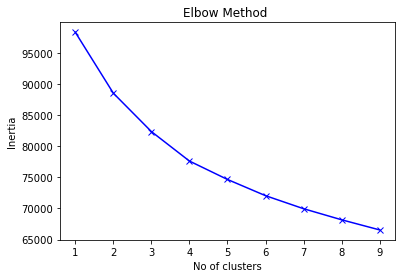

In [53]:
#Unsupervised clustering
#KMeans
from sklearn.cluster import KMeans
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method ')
plt.savefig('elbow.png',dpi=100,bbox_inches = 'tight')
plt.show()

In [54]:
y_pred = LabelEncoder().fit_transform(y_test)
kmeans = KMeans(n_clusters = 3, random_state=3)
kmeans = kmeans.fit(data_scaled)

kmeans.labels_

predictions = kmeans.predict(data_scaled)

unique,counts = np.unique(predictions,return_counts=True)
counts = counts.reshape(1,3)

countsldf = pd.DataFrame(counts, columns = ["Cluster 0", "Cluster 1", "Cluster 2"])
countsldf

#print("silhouette_score = ", metrics.silhouette_score(data_scaled, kmeans.labels_))
#print("completeness_score = ", metrics.completeness_score(y_pred,kmeans.labels_))
#print("homogeneity_score = ", metrics.homogeneity_score(y_pred, kmeans.labels_))


,Cluster 0,Cluster 1,Cluster 2
0,1746,2072,1966


In [49]:
from sklearn import metrics, cluster
from sklearn.preprocessing import LabelEncoder

n_samples, n_features = data_scaled.shape
n_digits = len(np.unique(y_test))
y2 = LabelEncoder().fit_transform(y_test)
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine")
model.fit(X_std)

print("silhouette_score = ", metrics.silhouette_score(data_scaled, model.labels_))
#all of the data points that we have of the same class are elements of the same cluster
print("completeness_score = ", metrics.completeness_score(y2, model.labels_))
# all of the clusters contain only data points, which are members of a single class
print("homogeneity_score = ", metrics.homogeneity_score(y2, model.labels_))


silhouette_score =  -0.007599160410464018
completeness_score =  0.36509476027788135
homogeneity_score =  0.3488377067985544


In [50]:
n_samples, n_features = X_std.shape
n_digits = len(np.unique(y_test))
y2 = LabelEncoder().fit_transform(y_test)
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"] 
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            print(a,l)
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(X_std)
            print("silhouette_score = ", metrics.silhouette_score(X_std, model.labels_))
            print("completeness_score = ", metrics.completeness_score(y2, model.labels_))
            print("homogeneity_score = ", metrics.homogeneity_score(y2, model.labels_))
            

euclidean ward
silhouette_score =  0.033150568181239286
completeness_score =  0.38308336135116444
homogeneity_score =  0.38818433760065046
euclidean complete
silhouette_score =  0.012024607395952678
completeness_score =  0.3452843194483854
homogeneity_score =  0.3095999015549579
euclidean average
silhouette_score =  -0.04663104162713469
completeness_score =  0.29821852973627233
homogeneity_score =  0.13904786265991706
l1 complete
silhouette_score =  0.00401197919905815
completeness_score =  0.36236161819664525
homogeneity_score =  0.34164313781557637
l1 average
silhouette_score =  -0.014814125275564883
completeness_score =  0.2952121480410532
homogeneity_score =  0.16448455303932555
l2 complete
silhouette_score =  0.012024607395952678
completeness_score =  0.3452843194483854
homogeneity_score =  0.3095999015549579
l2 average
silhouette_score =  -0.04663104162713469
completeness_score =  0.29821852973627233
homogeneity_score =  0.13904786265991706
manhattan complete
silhouette_score =  

2
silhouette_score =  0.10244764311514198
completeness_score =  0.06275447235958521
homogeneity_score =  0.008386923566781288
3
silhouette_score =  0.09177634187032571
completeness_score =  0.0951690144970523
homogeneity_score =  0.020132909184797477
4
silhouette_score =  0.09381177274978518
completeness_score =  0.21547156772882334
homogeneity_score =  0.05753160622691569
5
silhouette_score =  0.08663922618850053
completeness_score =  0.2031299918858851
homogeneity_score =  0.06305247774588844
6
silhouette_score =  0.08410608168727096
completeness_score =  0.20199884165996151
homogeneity_score =  0.06975527405050179
7
silhouette_score =  0.08280508691367527
completeness_score =  0.1954846154091359
homogeneity_score =  0.07334142421036544
8
silhouette_score =  0.08354500681061658
completeness_score =  0.19690539519222533
homogeneity_score =  0.07890821525316445
9
silhouette_score =  0.08233887634304124
completeness_score =  0.20406733607615637
homogeneity_score =  0.08645001190752102
1

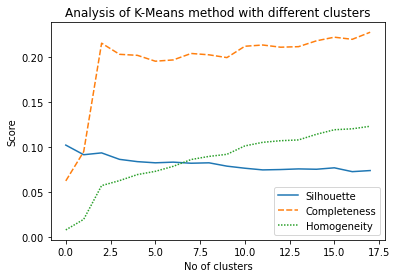

In [60]:
n_samples, n_features = data_scaled.shape
n_digits = len(np.unique(y_test))
y_pred = LabelEncoder().fit_transform(y_test)
s = []
c = []
h = []
for k in range(2, 20):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    print(k)
    s.append(metrics.silhouette_score(data_scaled, kmeans.labels_))
    c.append(metrics.completeness_score(y_pred, kmeans.labels_))
    h.append(metrics.homogeneity_score(y_pred, kmeans.labels_))
    print("silhouette_score = ", metrics.silhouette_score(data_scaled, kmeans.labels_))
    print("completeness_score = ", metrics.completeness_score(y_pred, kmeans.labels_))
    print("homogeneity_score = ", metrics.homogeneity_score(y_pred, kmeans.labels_))

xis = range(0,21)
xis
df = pd.DataFrame(list(zip(s,c,h)),
               columns =['Silhouette', 'Completeness','Homogeneity'])
sns.lineplot(data=df)
plt.xlabel('No of clusters')
plt.ylabel('Score')
plt.title('Analysis of K-Means method with different clusters')
plt.savefig('km.png',dpi=100,bbox_inches = 'tight')